In [75]:
import tensorflow as tf


In [76]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from keras.preprocessing import imagep 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

ImportError: cannot import name 'imagep' from 'keras.preprocessing' (/Users/felipereus/anaconda3/envs/eda_env/lib/python3.9/site-packages/keras/preprocessing/__init__.py)

In [58]:

import pandas as pd

 y prueba.
from sklearn.model_selection import train_test_split


TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

Training = os.listdir(TRAIN_PATH)

categories = []

for Training in Training:
    
    category = filename.split('.')[0]

    categories.append(category)

df = pd.DataFrame({
    'filenames': filenames,
    'category': categories
})

train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)


train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


NameError: name 'filename' is not defined

In [ ]:
#  ------------------------------ Modelo Creado y ajustando parametros ------------------------------

In [63]:
# Importa la biblioteca pandas con el alias 'pd'. Pandas es utilizada para la manipulación y análisis de datos.
import pandas as pd

# Importa la función train_test_split desde sklearn.model_selection. Esta función se utiliza para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Define una constante IM_SIZE con el valor 32. Esta constante podría usarse para establecer un tamaño estándar para las imágenes, aunque no se usa en este fragmento de código.
#IM_SIZE=32

# Define una variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# asigno tamaño y mejora de la estabilidad del modelo
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=(224, 224),
    batch_size=64
)

#----------------------------------------------------------------------------

# Preprocesamiento y Data Augmentation (opcional)
preprocessing_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# Creación del conjunto de datos con preprocesamiento
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=64,
    label_mode='categorical' # Para clasificación multiclase
).map(lambda x, y: (preprocessing_layer(x), y))

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="validation",
    #seed=123,
    image_size=(224, 224),
    batch_size=64,
    label_mode='categorical'
).map(lambda x, y: (preprocessing_layer(x), y))

# Construcción del modelo
model = tf.keras.models.Sequential([
    # Agregar capas aquí
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # ... más capas ...
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # Ajustar según el número de clases
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

# Puedes agregar código para guardar el modelo, evaluarlo, etc.


Found 4068 files belonging to 4 classes.
Found 4068 files belonging to 4 classes.
Using 3255 files for training.


ValueError: If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset.

In [ ]:
#      ----------------------     Porbando otro Modele    ---------------------- 
# imagenes a 224 x 224 

In [64]:
# Importa la biblioteca pandas con el alias 'pd'. Pandas es utilizada para la manipulación y análisis de datos.
import pandas as pd

# Importa la función train_test_split desde sklearn.model_selection. Esta función se utiliza para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Define una constante IM_SIZE con el valor 32. Esta constante podría usarse para establecer un tamaño estándar para las imágenes, aunque no se usa en este fragmento de código.
#IM_SIZE=32

# Define una variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# asigno tamaño y mejora de la estabilidad del modelo
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=(100, 100),
    batch_size=64
)

#----------------------------------------------------------------------------

# Preprocesamiento y Data Augmentation (opcional)
preprocessing_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# Creación del conjunto de datos con preprocesamiento
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(100, 100),
    batch_size=64,
    label_mode='categorical' # Para clasificación multiclase
).map(lambda x, y: (preprocessing_layer(x), y))

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(100, 100),
    batch_size=64,
    label_mode='categorical'
).map(lambda x, y: (preprocessing_layer(x), y))



Found 4068 files belonging to 4 classes.
Found 4068 files belonging to 4 classes.
Using 3255 files for training.
Found 4068 files belonging to 4 classes.
Using 813 files for validation.


In [30]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
])


In [31]:
base_model

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_dataset, 
    epochs=5,
    validation_data=validation_dataset
)


Epoch 1/5
51/51 [==============================] - 161s 3s/step - loss: 0.5668 - accuracy: 0.8467 - val_loss: 0.0255 - val_accuracy: 0.9975
Epoch 2/5
51/51 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
#  ------------------------------ Modelo Creado y ajustando parametros ------------------------------

In [66]:
# Importaciones necesarias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# Define una variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# Parámetros de Data Augmentation para el generador de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generador de datos de validación (sin data augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# Creación del conjunto de datos de entrenamiento y validación con Data Augmentation
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset="training",
    #seed=123,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    TRAIN_PATH,
    subset="validation",
    #seed=123,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Construcción del modelo con Dropout y Regularización L2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    # Puedes agregar más capas convolucionales y de pooling si es necesario
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularización L2
    Dropout(0.5),  # Capa de Dropout
    Dense(4, activation='softmax')
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Found 4068 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Epoch 1/10
63/63 [==============================] - 65s 1s/step - loss: 5.8842 - accuracy: 0.5177
Epoch 2/10
63/63 [==============================] - 67s 1s/step - loss: 1.0267 - accuracy: 0.7832
Epoch 3/10
63/63 [==============================] - 63s 1s/step - loss: 0.7690 - accuracy: 0.8449
Epoch 4/10
63/63 [==============================] - 62s 973ms/step - loss: 0.6479 - accuracy: 0.8621
Epoch 5/10
63/63 [==============================] - 65s 1s/step - loss: 0.5449 - accuracy: 0.8926
Epoch 6/10
63/63 [==============================] - 64s 1s/step - loss: 0.4785 - accuracy: 0.8944
Epoch 7/10
63/63 [==============================] - 60s 948ms/step - loss: 0.4081 - accuracy: 0.9076
Epoch 8/10
63/63 [==============================] - 70s 1s/step - loss: 0.3905 - accuracy: 0.9123
Epoch 9/10
63/63 [==============================] - 64s 1s/step - loss: 0.3541 - accuracy: 0.9133
Epoch 10/10
63/63 [============

In [73]:
# Importaciones necesarias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# Define una variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# Crear un ImageDataGenerator con los parámetros de data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Aquí especificas el porcentaje para validación
)

# Crear un ImageDataGenerator para la validación (sin data augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2  # Especificar el mismo porcentaje que para el entrenamiento
)

# Crear el generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training',  # Especificar el subset de entrenamiento
    seed=123
)

# Crear el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',  # Especificar el subset de validación
    seed=123
)

# Construcción del modelo (igual
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    # Puedes agregar más capas convolucionales y de pooling si es necesario
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularización L2
    Dropout(0.5),  # Capa de Dropout
    Dense(4, activation='softmax')
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Found 3256 images belonging to 4 classes.
Found 812 images belonging to 4 classes.
Epoch 1/10
50/50 [==============================] - 56s 1s/step - loss: 5.8391 - accuracy: 0.5442 - val_loss: 1.1533 - val_accuracy: 0.6992
Epoch 2/10
50/50 [==============================] - 51s 1s/step - loss: 0.9949 - accuracy: 0.7945 - val_loss: 0.7345 - val_accuracy: 0.9844
Epoch 3/10
50/50 [==============================] - 57s 1s/step - loss: 0.7844 - accuracy: 0.8421 - val_loss: 0.6080 - val_accuracy: 0.8711
Epoch 4/10
50/50 [==============================] - 57s 1s/step - loss: 0.6989 - accuracy: 0.8434 - val_loss: 0.5897 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 58s 1s/step - loss: 0.6222 - accuracy: 0.8669 - val_loss: 0.4216 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 61s 1s/step - loss: 0.5301 - accuracy: 0.8935 - val_loss: 0.3780 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 60s 1s/step - loss: 0.536

In [74]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_25 (Flatten)        (None, 394272)            0         
                                                                 
 dense_50 (Dense)            (None, 128)               50466944  
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 4)                 516       
                                                     

In [ ]:
#   ---------------------- modelo ajustado para subir val_Accuracy ------------------------    CODIGO A USAR

In [116]:
# Importaciones necesarias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

# Define una variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# Crear un ImageDataGenerator con los parámetros de data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Aquí especificas el porcentaje para validación
)

# Crear un ImageDataGenerator para la validación (sin data augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2  # Especificar el mismo porcentaje que para el entrenamiento
)

# Crear el generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='training',  # Especificar el subset de entrenamiento
    seed=123
)

# Crear el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='validation',  # Especificar el subset de validación
    seed=123
)
#---------------------------------------------
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
#---------------------------------------------
# Construcción del modelo (igual
#model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
#    MaxPooling2D((2, 2)),
#    # Puedes agregar más capas convolucionales y de pooling si es necesario
#    Flatten(),
#    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularización L2
#    Dropout(0.5),  # Capa de Dropout
#    Dense(4, activation='softmax')
#])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)



Found 3256 images belonging to 4 classes.
Found 812 images belonging to 4 classes.
Epoch 1/15
50/50 [==============================] - 21s 409ms/step - loss: 0.6671 - accuracy: 0.7215 - val_loss: 1.0761 - val_accuracy: 0.4271
Epoch 2/15
50/50 [==============================] - 22s 448ms/step - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/15
50/50 [==============================] - 20s 406ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 3.5278e-04 - val_accuracy: 1.0000
Epoch 4/15
50/50 [==============================] - 20s 402ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/15
50/50 [==============================] - 21s 413ms/step - loss: 9.2874e-04 - accuracy: 1.0000 - val_loss: 9.7881e-04 - val_accuracy: 1.0000
Epoch 6/15
50/50 [==============================] - 20s 391ms/step - loss: 3.9699e-04 - accuracy: 1.0000 - val_loss: 4.8535e-04 - val_accuracy: 1.0000
Epoch 7/15
50/50 [=====================

In [137]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar la imagen de prueba
img_path = 'DataSet/TetsY/pomelo.jpg'  # Reemplaza con la ruta de tu imagen de prueba
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar los valores de píxeles al rango [0, 1]

# Realizar la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions)

confidence = predictions[0, predicted_class]

# Definir un umbral de confianza
umbral_confianza = 0.74

# Verificar si la confianza supera el umbral
if confidence >= umbral_confianza:
    # Imprimir el resultado si la confianza es suficiente
    classes = ['limones', 'mandarinas', 'pomelos', 'naranjas']
    print(f"Clase predicha: {classes[predicted_class]} con confianza: {confidence:.2%}")
else:
    # Imprimir un mensaje si la confianza es insuficiente
    print("No estoy seguro de qué clase es esta imagen.")


1/1 [==============================] - 0s 21ms/step
Clase predicha: pomelos con confianza: 100.00%


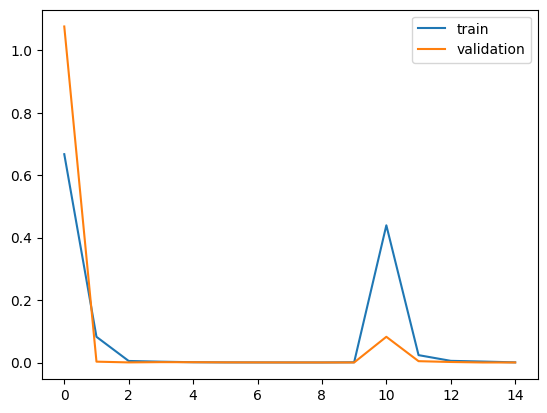

In [119]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()